In [1]:
# Load the module
import sphereint as sphint

# Helpers
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Nice progress bar

import sys
import time

def progressbar(it):
    size = 60
    count = len(it)
    start = time.time() # time estimate start
    def show(j):
        x = int(size*j/count)
        # time estimate calculation and string
        remaining = ((time.time() - start) / j) * (count - j)        
        mins, sec = divmod(remaining, 60) # limited to minutes
        time_str = f"{int(mins):02}:{sec:03.1f}"
        print(f"[{u'█'*x}{('.'*(size-x))}] {j}/{count} Est wait {time_str}", 
              end='\r', file=sys.stdout, flush=True)
    show(0.1) # avoid div/0 
    for i, item in enumerate(it):
        yield item
        show(i+1)
    print("\n", flush=True, file=sys.stdout)
    total_time = time.time() - start
    mins, sec = divmod(total_time, 60) # limited to minutes
    time_str = f"{int(mins):02}:{sec:03.1f}"
    print(f"total time used: {time_str}", flush=True, file=sys.stdout)
    print("\n", flush=True, file=sys.stdout)

In [3]:
# Data box size
L = 1000

# Test 3 radius sizes
radiusA = L/3
radiusB = L/10
radiusC = L/30

# True volume
volumeA = (4 * np.pi * radiusA**3) / 3
volumeB = (4 * np.pi * radiusB**3) / 3
volumeC = (4 * np.pi * radiusC**3) / 3

# True area
areaA = 4 * np.pi * radiusA**2
areaB = 4 * np.pi * radiusB**2
areaC = 4 * np.pi * radiusC**2

In [4]:
# Plotting relative difference for 3 diffent radius

def plot_error(allNs, errA, errB, errC, order):
    
    #A
    plt.plot(allNs, errA, marker='o', markersize=10, label='R = L/3', linewidth=0)
    order2 = [errA[-1]*((allNs[-1]/N)**order) for N in allNs]
    plt.loglog(allNs, order2, 'k:', linewidth=1)

    #B
    plt.plot(allNs, errB, marker='^', markersize=10, label='R = L/10', linewidth=0)
    order2 = [errB[-1]*((allNs[-1]/N)**order) for N in allNs]
    plt.loglog(allNs, order2, 'k:', linewidth=1)

    #C
    plt.plot(allNs, errC, marker='s', markersize=10, label='R = L/30', linewidth=0)
    order2 = [errC[-1]*((allNs[-1]/N)**order) for N in allNs]
    plt.loglog(allNs, order2, 'k:', linewidth=1, label=r'$N^{-2}$')

    plt.grid()
    plt.legend()
    plt.xlabel('N', fontsize=20)

# Volume

### Volume contained in sphere of given radius.

In [5]:
# =============== Using Geometrical method
print('Using geometrical method')

# Record relative error to plot next
errA_geo, errB_geo, errC_geo = [], [], []

# Try many different resolutions
allNs = np.array([int(np.ceil(i)) for i in np.geomspace(20, 150, 10)])
for N in progressbar(allNs):
    
    # Center of sphere
    centre = [int(N/4), int(2*N/4), int(3*N/4)]
    
    # Define class with input grid
    si = sphint.SphereIntegrate(N, L, centre) 
    
    #A
    si.radius_max = radiusA
    weights = si.get_box_weights_radius()
    errA_geo += [abs(np.sum(weights) * si.volume_cell / volumeA - 1)]
    
    #B
    si.radius_max = radiusB
    weights = si.get_box_weights_radius()
    errB_geo += [abs(np.sum(weights) * si.volume_cell / volumeB - 1)]
    
    #C
    si.radius_max = radiusC
    weights = si.get_box_weights_radius()
    errC_geo += [abs(np.sum(weights) * si.volume_cell / volumeC - 1)]

# =============== Using Monte Carlo method
print('Using Monte Carlo method') 

# Record relative error to plot next
errA_MC, errB_MC, errC_MC = [], [], []

# Try many different resolutions
allNs = np.array([int(np.ceil(i)) for i in np.geomspace(20, 150, 10)])
for N in progressbar(allNs):
    
    # Center of sphere
    centre = [int(N/4), int(2*N/4), int(3*N/4)]
    
    # Define class with input grid
    si = sphint.SphereIntegrate(N, L, centre) 
    si.geometrical = False
    
    #A
    si.radius_max = radiusA
    weights = si.get_box_weights_radius()
    errA_MC += [abs(np.sum(weights) * si.volume_cell / volumeA - 1)]
    
    #B
    si.radius_max = radiusB
    weights = si.get_box_weights_radius()
    errB_MC += [abs(np.sum(weights) * si.volume_cell / volumeB - 1)]
    
    #C
    si.radius_max = radiusC
    weights = si.get_box_weights_radius()
    errC_MC += [abs(np.sum(weights) * si.volume_cell / volumeC - 1)]

Using geometrical method
[████████████████████████████████████████████████████████████] 10/10 Est wait 00:0.00

total time used: 00:15.6


Using Monte Carlo method
[████████████████████████████████████████████████████████████] 10/10 Est wait 00:0.00

total time used: 00:34.6




The time of the Monte Carlo can be improved by decreasing Nrand_volume (default 10 000), this will then impact it's precision. Also, keep in mind that the geometrical method uses the Monte Carlo method in the cases that are too complicated.

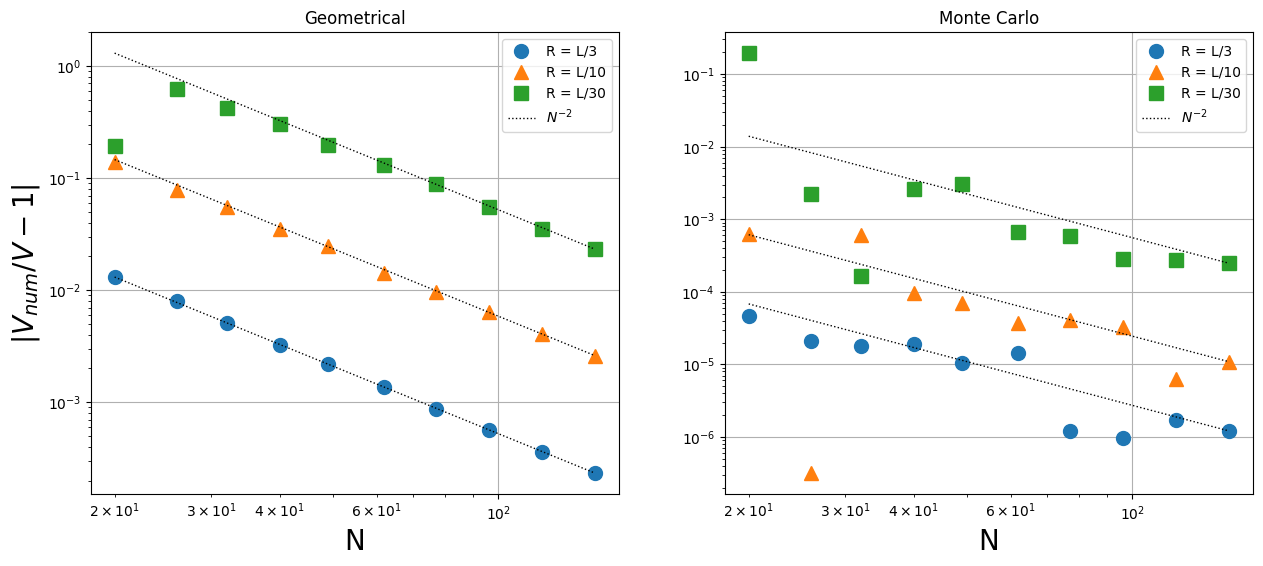

In [6]:
# Volume error, knowing it's a sphere
plt.figure(figsize=(15, 6))
plt.subplot(121)
plt.title('Geometrical')
plot_error(allNs, errA_geo, errB_geo, errC_geo, 2)
plt.ylabel(r'$|V_{num}/V-1|$', fontsize=20)


plt.subplot(122)
plt.title('Monte Carlo')
plot_error(allNs, errA_MC, errB_MC, errC_MC, 2)

The relative error of the Monte Carlo is clearly a couple order magnitudes better than the geometrical method. The randomness in the Monte Carlo sampling is the source of the variation around what seems to be 2nd order convergence. While the 2nd order convergence is clear in the geometrical case.

### Volume of sphere defined by input data.

In [5]:
# =============== Using Geometrical method
print('Using geometrical method')

# Record relative error to plot next
errA_geo, errB_geo, errC_geo = [], [], []

# Try many different resolutions
allNs = np.array([int(np.ceil(i)) for i in np.geomspace(20, 150, 10)])
for N in progressbar(allNs):
    
    # Center of sphere
    centre = [int(N/4), int(2*N/4), int(3*N/4)]
    
    # Define class with input grid
    si = sphint.SphereIntegrate(N, L, centre)
    
    # Define radius of grid
    x, y, z = np.meshgrid(si.x1d, si.x1d, si.x1d, indexing='ij')
    r = np.sqrt(x**2 + y**2 + z**2) 
    
    # Shift radius to start from center of sphere
    r = si.shift_grid0_to_igrid(r) 
    
    #A
    # define data to be negative inside boundary radius
    # and positive otherwise
    data = r - radiusA
    weights = si.get_box_weights_data(data)
    errA_geo += [abs(np.sum(weights) * si.volume_cell / volumeA - 1)]
    
    #B
    data = r - radiusB
    weights = si.get_box_weights_data(data)
    errB_geo += [abs(np.sum(weights) * si.volume_cell / volumeB - 1)]
    
    #C
    data = r - radiusC
    weights = si.get_box_weights_data(data)
    errC_geo += [abs(np.sum(weights) * si.volume_cell / volumeC - 1)]

# =============== Using Monte Carlo method
print('Using Monte Carlo method') 

# Record relative error to plot next
errA_MC, errB_MC, errC_MC = [], [], []

# Try many different resolutions
allNs = np.array([int(np.ceil(i)) for i in np.geomspace(20, 150, 10)])
for N in progressbar(allNs):
    
    # Center of sphere
    centre = [int(N/4), int(2*N/4), int(3*N/4)]
    
    # Define class with input grid
    si = sphint.SphereIntegrate(N, L, centre)
    si.geometrical = False
    
    # Define radius of grid
    x, y, z = np.meshgrid(si.x1d, si.x1d, si.x1d, indexing='ij')
    r = np.sqrt(x**2 + y**2 + z**2) 
    
    # Shift radius to start from center of sphere
    r = si.shift_grid0_to_igrid(r) 
    
    #A
    # define data to be negative inside boundary radius
    # and positive otherwise
    data = r - radiusA
    weights = si.get_box_weights_data(data)
    errA_MC += [abs(np.sum(weights) * si.volume_cell / volumeA - 1)]
    
    #B
    data = r - radiusB
    weights = si.get_box_weights_data(data)
    errB_MC += [abs(np.sum(weights) * si.volume_cell / volumeB - 1)]
    
    #C
    data = r - radiusC
    weights = si.get_box_weights_data(data)
    errC_MC += [abs(np.sum(weights) * si.volume_cell / volumeC - 1)]

Using geometrical method
[████████████████████████████████████████████████████████████] 10/10 Est wait 00:0.00

total time used: 01:35.1


Using Monte Carlo method
[████████████████████████████████████████████████████████████] 10/10 Est wait 00:0.00

total time used: 11:38.9




When the conditional function containing the domain boundary is not provided, scipy interpolation is used instead, clearly this increases computational time.

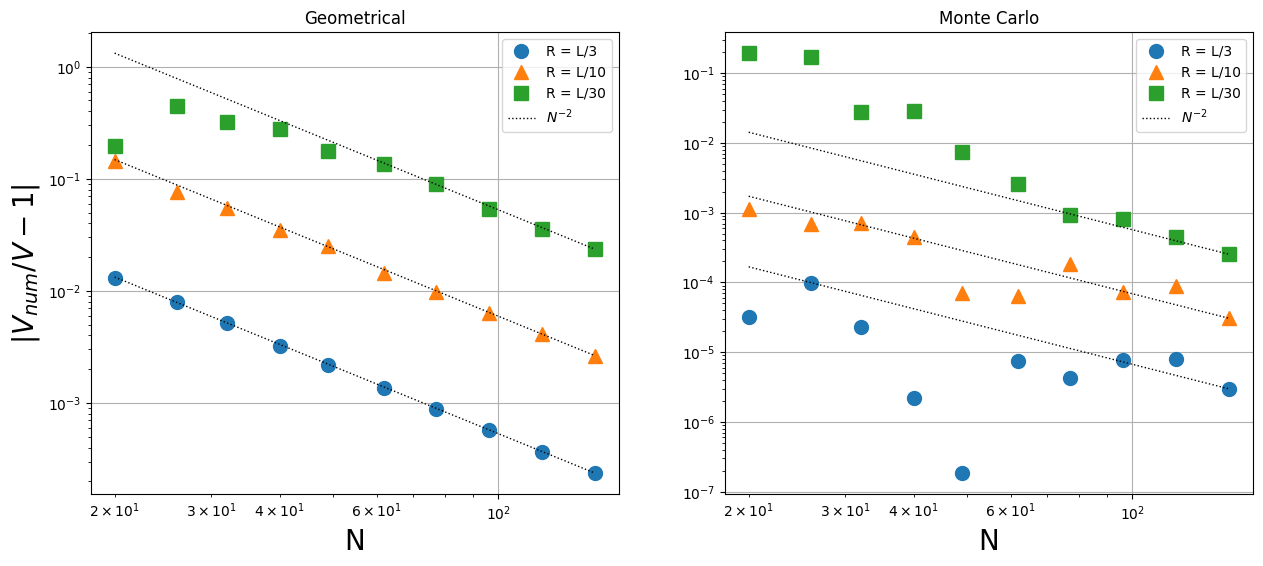

In [6]:
# Volume error, NOT knowing it's a sphere
plt.figure(figsize=(15, 6))
plt.subplot(121)
plt.title('Geometrical')
plot_error(allNs, errA_geo, errB_geo, errC_geo, 2)
plt.ylabel(r'$|V_{num}/V-1|$', fontsize=20)


plt.subplot(122)
plt.title('Monte Carlo')
plot_error(allNs, errA_MC, errB_MC, errC_MC, 2)

# Area

### Area of sphere of given radius.

In [5]:
# =============== Using Geometrical method
print('Using geometrical method')

# Record relative error to plot next
errA_geo, errB_geo, errC_geo = [], [], []

# Try many different resolutions
allNs_geo = np.array([int(np.ceil(i)) for i in np.geomspace(20, 150, 10)])
for N in progressbar(allNs_geo):
    
    # Center of sphere
    centre = [int(N/4), int(2*N/4), int(3*N/4)]
    
    # Define class with input grid
    si = sphint.SphereIntegrate(N, L, centre)
    
    #A
    si.radius_max = radiusA
    weights = si.get_box_weights_radius(domain='area')
    errA_geo += [abs(np.sum(weights) * si.area_cell / areaA - 1)]
    
    #B
    si.radius_max = radiusB
    weights = si.get_box_weights_radius(domain='area')
    errB_geo += [abs(np.sum(weights) * si.area_cell / areaB - 1)]
    
    #C
    si.radius_max = radiusC
    weights = si.get_box_weights_radius(domain='area')
    errC_geo += [abs(np.sum(weights) * si.area_cell / areaC - 1)]

# =============== Using Monte Carlo method
print('Using Monte Carlo method') 

# Record relative error to plot next
errA_MC, errB_MC, errC_MC = [], [], []

# Try many different resolutions
allNs_MC = np.array([int(np.ceil(i)) for i in np.geomspace(20, 150, 5)])
for N in progressbar(allNs_MC):
    
    # Center of sphere
    centre = [int(N/4), int(2*N/4), int(3*N/4)]
    
    # Define class with input grid
    si = sphint.SphereIntegrate(N, L, centre)
    si.geometrical = False
    
    #A
    #si.radius_max = radiusA
    #weights = si.get_box_weights_radius(domain='area')
    errA_MC += [0]#abs(np.sum(weights) * si.area_cell / areaA - 1)]
    
    #B
    si.radius_max = radiusB
    weights = si.get_box_weights_radius(domain='area')
    errB_MC += [abs(np.sum(weights) * si.area_cell / areaB - 1)]
    
    #C
    #si.radius_max = radiusC
    #weights = si.get_box_weights_radius(domain='area')
    errC_MC += [0]#abs(np.sum(weights) * si.area_cell / areaC - 1)]

Using geometrical method
[████████████████████████████████████████████████████████████] 10/10 Est wait 00:0.00

total time used: 00:16.6


Using Monte Carlo method
[████████████████████████████████████████████████████████████] 5/5 Est wait 00:0.040

total time used: 07:10.2




The time of the Monte Carlo can be improved by decreasing Nrand_area (default 10 on top of the points cell boundary points), this will then impact it's precision. Also, keep in mind that the geometrical method uses the Monte Carlo method in the cases that are too complicated.

/var/folders/qw/k_c451h55_346t71454cl33h0000gq/T/ipykernel_27058/3580928512.py:8: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.loglog(allNs, order2, 'k:', linewidth=1)


(0.0001, 3.0)

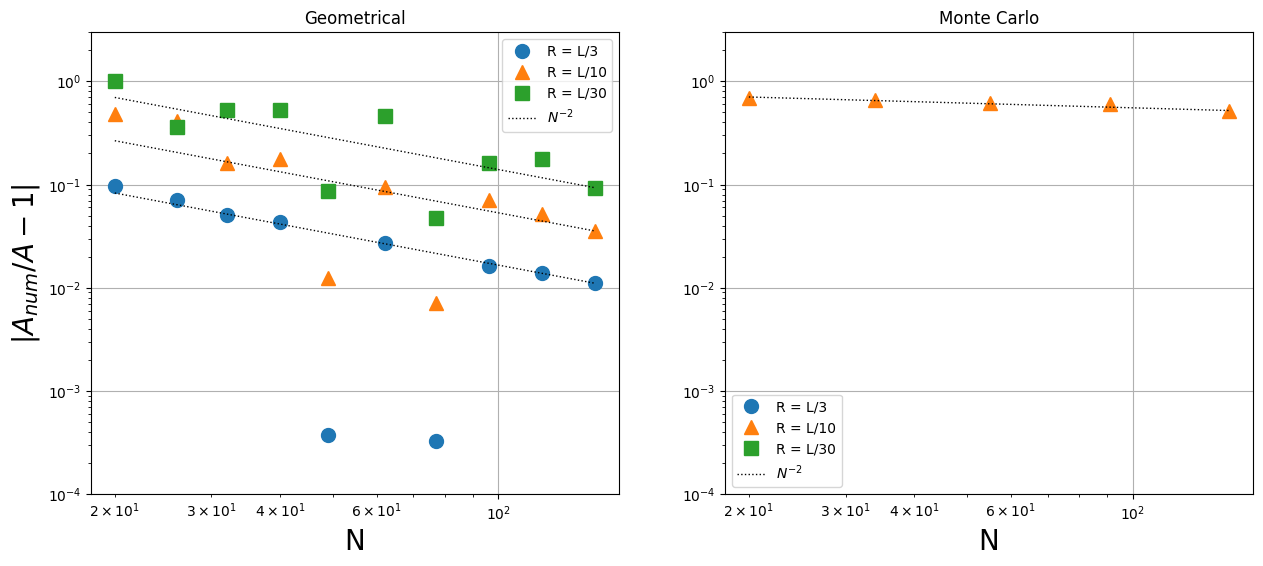

In [11]:
# Area error, knowing it's a sphere
plt.figure(figsize=(15, 6))
plt.subplot(121)
plt.title('Geometrical')
plot_error(allNs_geo, errA_geo, errB_geo, errC_geo, 1)
plt.ylabel(r'$|A_{num}/A-1|$', fontsize=20)
plt.ylim(1e-4, 3e0)


plt.subplot(122)
plt.title('Monte Carlo')
plot_error(allNs_MC, errA_MC, errB_MC, errC_MC, 0.15)
plt.ylim(1e-4, 3e0)

### Area of sphere defined by input data.

In [ ]:
# =============== Using Geometrical method
print('Using geometrical method')

# Record relative error to plot next
errA_geo, errB_geo, errC_geo = [], [], []

# Try many different resolutions
allNs = np.array([int(np.ceil(i)) for i in np.geomspace(20, 150, 10)])
for N in progressbar(allNs):
    
    # Center of sphere
    centre = [int(N/4), int(2*N/4), int(3*N/4)]
    
    # Define class with input grid
    si = sphint.SphereIntegrate(N, L, centre)
    
    # Define radius of grid
    x, y, z = np.meshgrid(si.x1d, si.x1d, si.x1d, indexing='ij')
    r = np.sqrt(x**2 + y**2 + z**2) 
    
    # Shift radius to start from center of sphere
    r = si.shift_grid0_to_igrid(r) 
    
    #A
    # define data to be negative inside boundary radius
    # and positive otherwise
    data = r - radiusA
    weights = si.get_box_weights_data(data, domain='area')
    errA_geo += [abs(np.sum(weights) * si.area_cell / areaA - 1)]
    
    #B
    data = r - radiusB
    weights = si.get_box_weights_data(data, domain='area')
    errB_geo += [abs(np.sum(weights) * si.area_cell / areaB - 1)]
    
    #C
    data = r - radiusC
    weights = si.get_box_weights_data(data, domain='area')
    errC_geo += [abs(np.sum(weights) * si.area_cell / areaC - 1)]

[████████████████████████████████████████████████████████████] 10/10 Est wait 00:0.00

total time used: 01:26.8




Text(0, 0.5, '$|A_{num}/A-1|$')

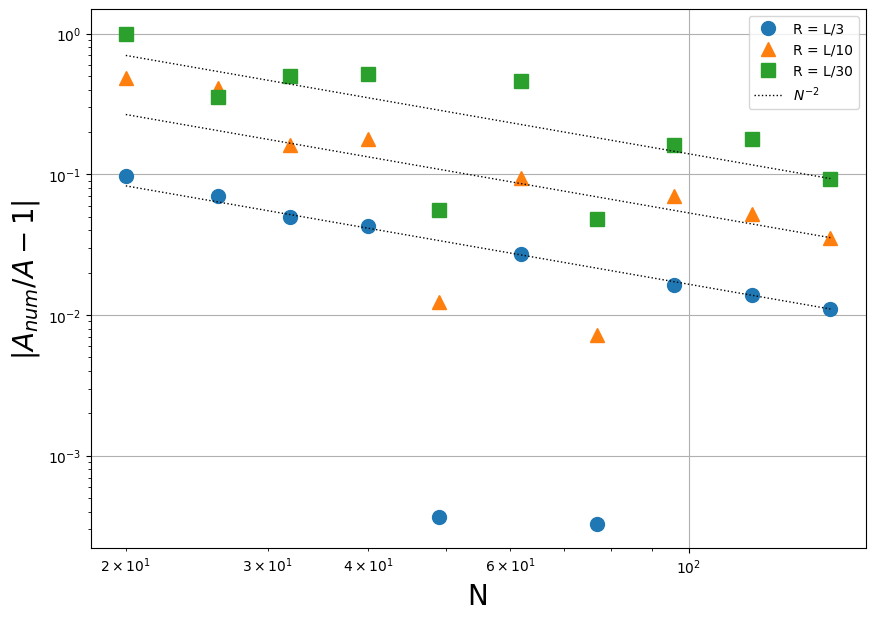

In [ ]:
# Area error, NOT knowing it's a sphere
plt.figure(figsize=(15, 6))
plt.subplot(121)
plt.title('Geometrical')
plot_error(allNs, errA_geo, errB_geo, errC_geo, 2)
plt.ylabel(r'$|A_{num}/A-1|$', fontsize=20)


plt.subplot(122)
plt.title('Monte Carlo')
plot_error(allNs, errA_MC, errB_MC, errC_MC, 2)